In [79]:
import re 
import string
import PyPDF2
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [80]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [81]:
with open('young-robert-f-the-dandelion-girl.txt') as f:
    clean = f.read().splitlines()

In [82]:
clean

['-1-',
 '',
 'The Dandelion Girl',
 'Robert F. Young',
 'The girl on the hill made Mark think of Edna St. Vincent Millay. Perhaps it was because',
 'of the way she was standing there in the afternoon sun, her dandelion-hued hair dancing in the',
 'wind; perhaps it was because of the way her old-fashioned white dress was swirling around her',
 'long and slender legs. In any event, he got the definite impression that she had somehow stepped',
 "out of the past and into the present; and that was odd, because as things turned out, it wasn't the",
 'past she had stepped out of, but the future.',
 'He paused some distance behind her, breathing hard from the climb. She had not seen',
 'him yet, and he wondered how he could apprise her of his presence without alarming her. While',
 'he was trying to make up his mind, he took out his pipe and filled and lighted it, cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life. When he looked at her',
 'again, she had tu

In [83]:
shear = [re.sub(r"[^\w\d'\s]+", "", s) for s in clean] # get rid of punctuation
shear = [re.sub('\w*\d\w*', '', s) for s in shear] # get rid of numbers

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [84]:
shear

['',
 '',
 'The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because',
 'of the way she was standing there in the afternoon sun her dandelionhued hair dancing in the',
 'wind perhaps it was because of the way her oldfashioned white dress was swirling around her',
 'long and slender legs In any event he got the definite impression that she had somehow stepped',
 "out of the past and into the present and that was odd because as things turned out it wasn't the",
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen',
 'him yet and he wondered how he could apprise her of his presence without alarming her While',
 'he was trying to make up his mind he took out his pipe and filled and lighted it cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her',
 'again she had turned around and was regar

In [85]:
shears

['',
 '',
 'The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because',
 'of the way she was standing there in the afternoon sun her dandelionhued hair dancing in the',
 'wind perhaps it was because of the way her oldfashioned white dress was swirling around her',
 'long and slender legs In any event he got the definite impression that she had somehow stepped',
 "out of the past and into the present and that was odd because as things turned out it wasn't the",
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen',
 'him yet and he wondered how he could apprise her of his presence without alarming her While',
 'he was trying to make up his mind he took out his pipe and filled and lighted it cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her',
 'again she had turned around and was regar

In [86]:
shearss

['The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because',
 'of the way she was standing there in the afternoon sun her dandelionhued hair dancing in the',
 'wind perhaps it was because of the way her oldfashioned white dress was swirling around her',
 'long and slender legs In any event he got the definite impression that she had somehow stepped',
 "out of the past and into the present and that was odd because as things turned out it wasn't the",
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen',
 'him yet and he wondered how he could apprise her of his presence without alarming her While',
 'he was trying to make up his mind he took out his pipe and filled and lighted it cupping his',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her',
 'again she had turned around and was regarding him c

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/nyjoey/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [88]:
vect = TfidfVectorizer(ngram_range=(1,1),stop_words='english')

In [89]:
dtm = vect.fit_transform(shearss)

In [90]:
dtm

<380x1132 sparse matrix of type '<class 'numpy.float64'>'
	with 2211 stored elements in Compressed Sparse Row format>

In [91]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,able,abrupt,absence,access,accident,according,act,acute,ad,added,...,wouldn,writing,written,year,yearn,years,yellow,yes,yesterday,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.614139
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [92]:
lda = LatentDirichletAllocation(n_components=20)

In [93]:
lda_dtf = lda.fit_transform(dtm)

/home/nyjoey/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [94]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [95]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
seen          wouldn        concept       drainboard    blue          
come          pretty        way           forced        know          
suitcase      hill          love          robert        don           
looked        stepped       looked        breaking      saw           
startled      half          man           distance      living        
bench         probably      right         law           minute        
granite       anne          nodded        face          changed       
ll            came          feel          young         eyes          
sat           mr            mr            came          time          
standing      randolph      knowing       interima      liberties     




In [96]:
topic1 = np.argsort(lda_dtf[:,4])[::-1]
for i in topic1[:10]:
     print(shearss[i] + "\n")

her blue eyes glisten Time machines run down she said They have parts that need to be

He prepared and ate a simple supper in the kitchen then went into the living room to

The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because

replacedand I don't know how to replace them Oursmine may be good for one more trip

That's because my father invented his own machine and the time police don't know

On the second afternoon she was wearing a blue dress and there was a little blue ribbon

Her eyes were blue he saw when he came up to heras blue as the sky that framed her

there had been a brief interim during which making a living had lost some of its immediacy And

way through law school at twentyfour he had had his own practice and small though it had

safe to take liberties with her first She must have done other things too in addition to changing



In [97]:
topic2 = np.argsort(lda_dtf[:,3])[::-1]
for i in topic2[:10]:
    print(shearss[i] + "\n")

gentle face and the long and slender legs had a grace and symmetry in the pale glow of the

authorized personnel have access to its time machines and maintains a police force to apprehend

and lighted his pipe He forced himself to think of Anne and presently her face came into

lake but a deep one and the trees came down to its edge The cabin stood some distance back

jury duty he had been forced to spend alone the two weeks he had saved out of his summer

feelings Mr Randolph But I'm not a child honest I'm not Promise me you'll never call me one

members of governmentsponsored historical expeditions and is out of bounds to the general

attic to get them The suitcase fell from a shelf while he was rummaging through the various

back under him where they belonged and the world had returned to its sane and sensible orbit

castle making it less of a reality than a dream Are you from the city too he asked



In [98]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [99]:
d = path.dirname(__name__)

In [100]:
text = open(path.join(d, 'young-robert-f-the-dandelion-girl.txt')).read()

In [101]:
stopwords = set(STOPWORDS)

In [102]:
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)

In [103]:
wc.generate(text)

In [104]:
wc.to_file(path.join(d, "cloud.png"))

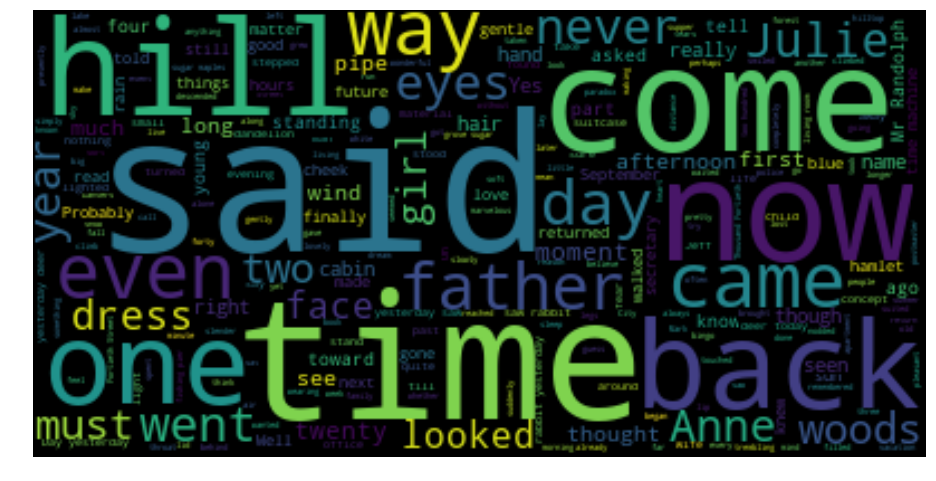

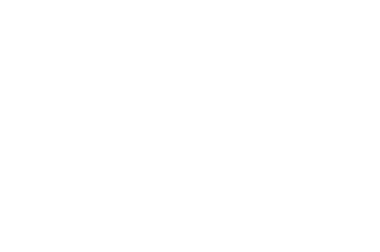

In [105]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()